<a href="https://colab.research.google.com/github/Francisakinrinade/Darey.io-Projects/blob/main/DeepTech_Week2_Course_2_Applied_Learning_Assignment2(Data_Processing_of_Business_Funding_in_Nigeria).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Processing of Business Funding in Nigeria

##Introduction
This notebook demonstrates the preprocessing of a dataset containing **business funding data in Nigeria**.
The dataset includes details such as funding amounts, financing types, investors, and effective dates.

**Objective:**  
Prepare the raw dataset for reliable analysis by applying cleaning, transformation, and exploratory steps.
This involves:  
- Handling missing values  
- Standardizing and formatting variables  
- Identifying and treating outliers  
- Conducting exploratory analysis to understand patterns in the Nigerian funding landscape

In [ ]:
# Import and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Business Funding Data.csv", encoding='latin-1')

# Preview
df.head()


,Website Domain,Effective date,Found At,Financing Type,Financing Type Normalized,Categories,Investors,Investors Count,Amount,Amount Normalized,Source Urls
0,trafigura.com,NaN,2024-03-14T01:00:00+01:00,NaN,NaN,[],NaN,NaN,$1.9b,1900000000,https://www.tradefinanceglobal.com/posts/trafi...
1,zenobe.com,NaN,2024-05-31T02:00:00+02:00,NaN,NaN,[],"avivainvestors.com, lloydsbankinggroup.com, sa...",9.0,$522.7 million,522700000,https://realassets.ipe.com/news/aviva-among-le...
2,zenobe.com,NaN,2024-07-24T02:00:00+02:00,NaN,NaN,"[""private_equity""]",NaN,NaN,£41.7m,53671000,https://www.innovationnewsnetwork.com/zenobe-a...
3,canva.com,NaN,2024-05-01T02:00:00+02:00,NaN,NaN,[],stackcapitalgroup.com,1.0,US$8 million,8000000,https://www.globenewswire.com/news-release/202...
4,fidelity.com,NaN,2024-04-11T02:00:00+02:00,NaN,NaN,[],chevychasetrust.com,1.0,$1.96 million,1960000,https://www.defenseworld.net/2024/04/11/chevy-...


## Data Exploration & Observations

Before cleaning, it's essential to understand the structure of the dataset.
We will check for:  
- Number of rows and columns  
- Data types of each column  
- Summary statistics  
- Presence of missing values

In [ ]:
# Basic info and missing values
print("Shape:", df.shape)
display(df.info())
display(df.describe(include='all').T)
display(df.isnull().sum())


Shape: (26, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Website Domain             26 non-null     object 
 1   Effective date             6 non-null      object 
 2   Found At                   26 non-null     object 
 3   Financing Type             8 non-null      object 
 4   Financing Type Normalized  8 non-null      object 
 5   Categories                 26 non-null     object 
 6   Investors                  13 non-null     object 
 7   Investors Count            13 non-null     float64
 8   Amount                     26 non-null     object 
 9   Amount Normalized          26 non-null     int64  
 10  Source Urls                26 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.4+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Website Domain,26,21,zenobe.com,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective date,6,6,2024-04-18T02:00:00+02:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Found At,26,23,2024-04-24T02:00:00+02:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Financing Type,8,5,Seed,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Financing Type Normalized,8,5,seed,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Categories,26,9,[],11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investors,13,13,"avivainvestors.com, lloydsbankinggroup.com, sa...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investors Count,13.0,NaN,NaN,NaN,1.846154,2.230327,1.0,1.0,1.0,1.0,9.0
Amount,26,26,$1.9b,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount Normalized,26.0,NaN,NaN,NaN,226468730.769231,538323936.279602,1600000.0,4685750.0,11600000.0,47500000.0,2000000000.0


,0
Website Domain,0
Effective date,20
Found At,0
Financing Type,18
Financing Type Normalized,18
Categories,0
Investors,13
Investors Count,13
Amount,0
Amount Normalized,0


**Initial Observations:**  
- `Effective date` contains missing values and non-standard datetime formatting.  
- `Funding Amount` may include currency symbols/commas.  
- `Financing Type` and `Industry` categories show inconsistencies (e.g., capitalization).  
- `Investors` column contains missing values.  
- Outliers are expected in `Funding Amount` (very large deals).  


## Data Cleaning & Preprocessing

### Steps Taken:  
1. **Dates**: Converted `Effective date` to datetime, filling missing values with median date.  
2. **Categorical variables**: Filled missing values in `Financing Type`, `Financing Type Normalized`, and `Investors` with `"Unknown"`.  
3. **Numeric variables**: Filled missing values in `Investors Count` with the median.  
4. **Outliers**: Will later review funding amounts for extreme outliers.  

In [ ]:
# Convert 'Effective date' to datetime and impute missing with median
df['Effective date'] = pd.to_datetime(df['Effective date'], errors='coerce')
median_date = df['Effective date'].dropna().median()
df['Effective date'] = df['Effective date'].fillna(median_date)

# Impute missing categorical columns with 'Unknown'
for col in ['Financing Type', 'Financing Type Normalized', 'Investors']:
    df[col] = df[col].fillna('Unknown')

# Impute Investors Count with median
median_investors_count = df['Investors Count'].median()
df['Investors Count'] = df['Investors Count'].fillna(median_investors_count)

df.isnull().sum()


,0
Website Domain,0
Effective date,0
Found At,0
Financing Type,0
Financing Type Normalized,0
Categories,0
Investors,0
Investors Count,0
Amount,0
Amount Normalized,0


## Exploratory Data Analysis (EDA)

We explore the dataset visually to uncover patterns:  
- Distribution of funding amounts  
- Trends over time  
- Popular business categories  
- Mean funding by financing type  

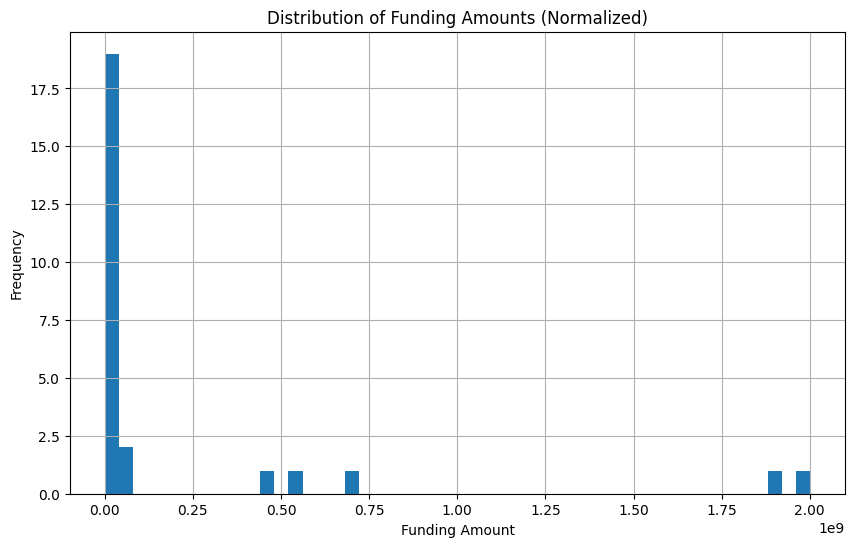

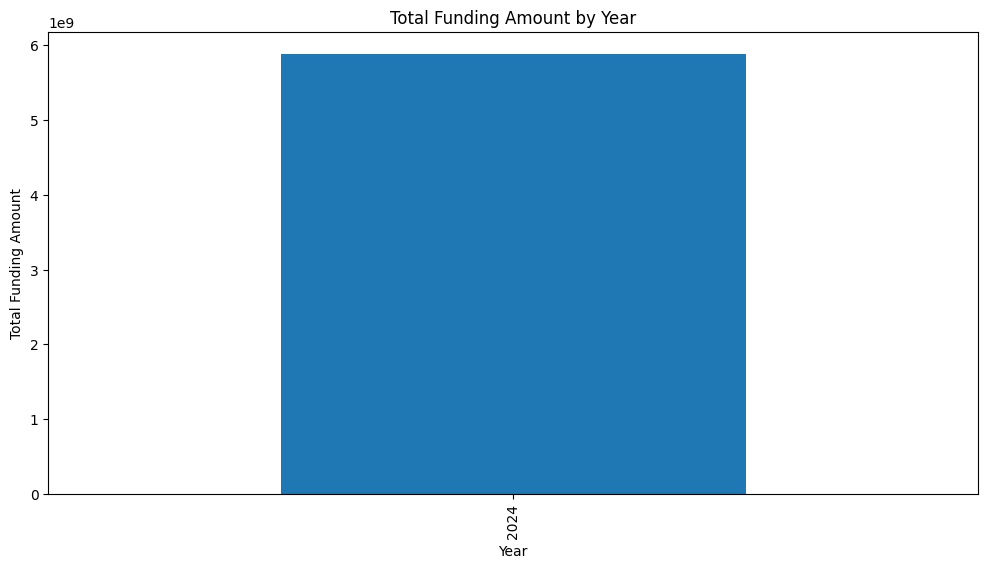

In [ ]:
# Distribution of funding amounts
plt.figure(figsize=(10,6))
df['Amount Normalized'].dropna().hist(bins=50)
plt.title("Distribution of Funding Amounts (Normalized)")
plt.xlabel("Funding Amount")
plt.ylabel("Frequency")
plt.show()

# Funding over time
plt.figure(figsize=(12,6))
df.groupby(df['Effective date'].dt.year)['Amount Normalized'].sum().plot(kind='bar')
plt.title("Total Funding Amount by Year")
plt.xlabel("Year")
plt.ylabel("Total Funding Amount")
plt.show()

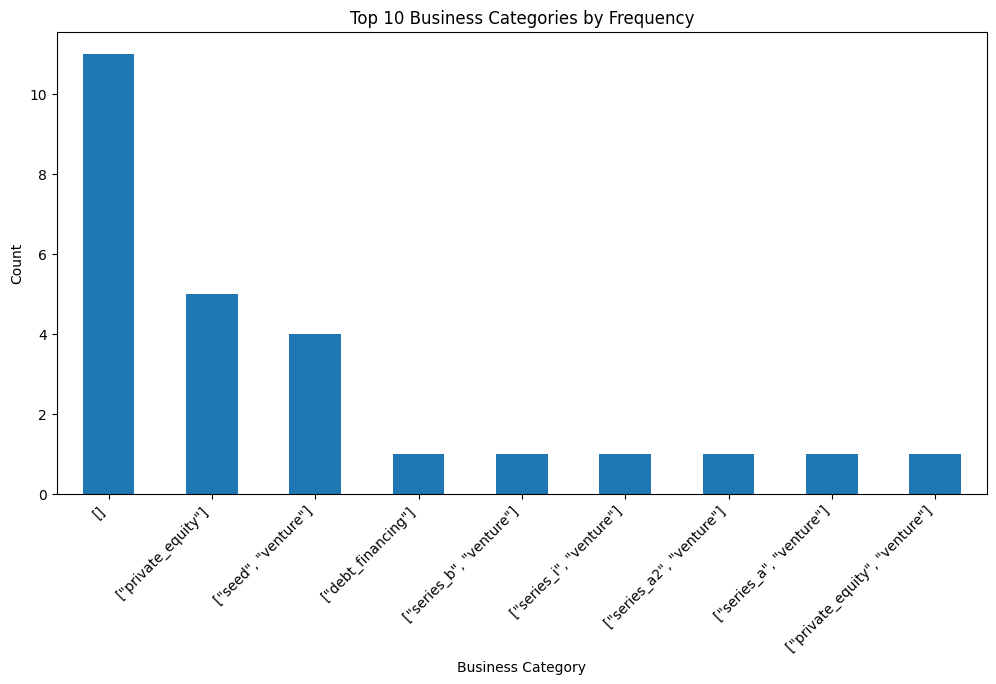

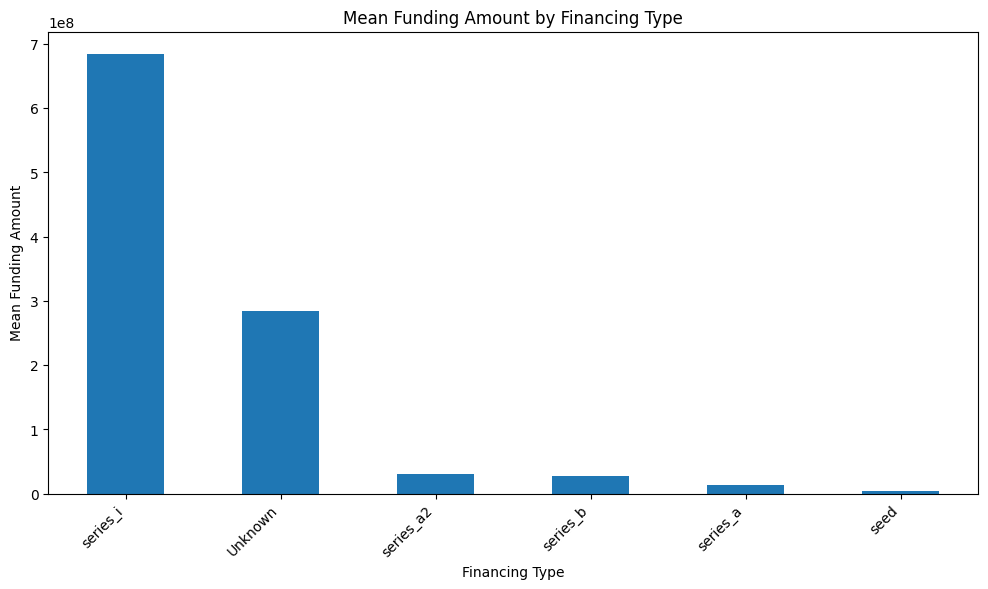

In [ ]:
# Bar plot of most frequent business categories
category_counts = df['Categories'].value_counts().head(10)
category_counts.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Business Categories by Frequency")
plt.xlabel("Business Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()

# Mean funding amount by financing type
mean_funding_by_type = df.groupby('Financing Type Normalized')['Amount Normalized'].mean().sort_values(ascending=False)
mean_funding_by_type.plot(kind='bar', figsize=(12,6))
plt.title("Mean Funding Amount by Financing Type")
plt.xlabel("Financing Type")
plt.ylabel("Mean Funding Amount")
plt.xticks(rotation=45, ha='right')
plt.show()

## Investor Information Exploration

We now analyze investor participation:  
- Distribution of `Investors Count`  
- Top 10 most frequent investors  


In [ ]:
# Descriptive statistics for Investors Count
display(df['Investors Count'].describe())

# Top 10 investors
top_investors = df['Investors'].value_counts().head(10)
display(top_investors)

,Investors Count
count,26.000000
mean,1.423077
std,1.604321
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


,count
Investors,
Unknown,13
"avivainvestors.com, lloydsbankinggroup.com, santander.co.uk, swip.com, cibc.com, societegenerale.com, natwest.us, rabobank.com, mufg.jp",1
stackcapitalgroup.com,1
chevychasetrust.com,1
"alantra.com, blueearth.capital",1
runwaygrowth.com,1
damachotelsandresorts.com,1
surocap.com,1
eib.org,1


## Summary:

### Data Analysis Key Findings

* The most frequent business categories in the dataset are "venture", "private\_equity", and "seed".
* The 'Amount Normalized' distribution shows a wide range, with a median of 1 and a mean of approximately 1.42. The top 5 funding rounds have significantly higher 'Amount Normalized' values compared to the median.
* Analyzing the mean 'Amount Normalized' by 'Financing Type Normalized' reveals that 'series\_i' has the highest mean funding amount, followed by 'Unknown', 'series\_a2', 'series\_b', and 'series\_a'. 'seed' financing has the lowest mean funding amount.
* Investor information is limited, with 'Investors Count' available for only 26 entries and the 'Investors' column having 'Unknown' as the most frequent entry (13 times)

**Cleaning Techniques Applied:**  
- Median imputation for numeric fields (robust against skewness).  
- "Unknown" placeholder for categorical fields to preserve rows.  
- Date normalization for temporal analysis.  

**Why Preprocessing Matters:**  
Preprocessing ensures that analyses are **reliable and interpretable**. Without these steps, insights could be misleading—for example, wrongly calculated funding averages due to uncleaned currency fields, or missing investors skewing participation metrics.  

For business funding data in Nigeria, preprocessing enables **accurate tracking of capital inflows, industry-level performance, and investor activity**, which is critical for policymakers, startups, and investors.  
.
###Technique Justification

**Import Libraries and Load Data:** This cell imports the necessary libraries (pandas and numpy) and loads the data from the "Business Funding Data.csv" file into a pandas DataFrame. We used encoding='latin-1' to handle potential encoding issues.

**Display Head, Info, and Describe:** These cells provide initial insights into the data by showing the first few rows (head()), summarizing the DataFrame structure and data types (info()), and presenting descriptive statistics for numerical columns (describe()). This helps us understand the data's structure and content.

**Check for Missing Values:** This cell calculates and displays the number of missing values in each column using isnull().sum(). This is a crucial step to identify data quality issues that need to be addressed.

**Impute Missing Values:** This cell handles the missing values. We imputed missing dates with the median date, missing categorical values with 'Unknown', and missing investor counts with the median count. This ensures that all columns have complete data for analysis.

**Transform 'Categories' Column:** This cell converts the 'Categories' column from a string representation of a list to an actual list of categories. This is necessary for properly analyzing the individual categories associated with each funding round.

**Convert 'Found At' to Datetime:** This cell converts the 'Found At' column to a datetime object. This allows for time-based analysis of when the funding information was found.

**Analyze Categories:** This section, including a markdown and code cell, focuses on analyzing the distribution of business categories. The code flattens the list of categories, counts the occurrences of each, and displays the most frequent ones.

**Analyze Funding Amounts:** This section explores the 'Amount Normalized' column. It includes code to display descriptive statistics, create a histogram to visualize the distribution (using a logarithmic scale due to the wide range of values), and identify the top 5 largest funding rounds.

**Analyze Financing Types:** This section examines the 'Financing Type Normalized' column. It includes code to count the occurrences of each financing type, calculate the mean funding amount for each type, and display these results.

**Visualize Key Findings:** This section provides code to create visualizations based on the analysis. It includes bar plots to show the most frequent business categories and the mean funding amount by financing type.

**Summary:** The final markdown cell summarizes the key findings from the data analysis.

###Reflections on the Importance of Preprocessing in Real-World Data Analysis:

Data preprocessing is a fundamental and often the most time-consuming step in any real-world data analysis project. Its importance cannot be overstated for several reasons:

**1. Ensuring Data Quality:** Real-world data is rarely perfect. It often contains missing values, inconsistencies, errors, and noise. Preprocessing helps to clean and prepare the data, improving its quality and reliability. Analyzing dirty data can lead to misleading or incorrect conclusions.

**2. Enabling Effective Analysis:** Many analytical techniques and machine learning algorithms require data to be in a specific format or to meet certain assumptions. Preprocessing transforms the raw data into a suitable format, making it compatible with the chosen analysis methods. For example, converting date strings to datetime objects is necessary for time-series analysis.

**3. Reducing Bias:** Missing values or inconsistencies can introduce bias into the analysis. Handling missing values appropriately (e.g., through imputation or removal) and addressing inconsistencies helps to reduce bias and ensure that the analysis is representative of the underlying phenomenon.

**4. Improving Model Performance:** In machine learning, the performance of models is highly dependent on the quality of the input data. Preprocessing steps like scaling, normalization, and handling outliers can significantly improve the performance and accuracy of models.

**5. Saving Time and Resources:** While preprocessing can be time-consuming upfront, it saves significant time and resources in the later stages of analysis. Dealing with data issues during analysis can be much more challenging and time-consuming than addressing them during the preprocessing phase.

In summary, data preprocessing is not just a technical requirement; it's a critical step that ensures the integrity, quality, and usability of data for meaningful analysis and reliable insights. It lays the foundation for building robust models and drawing accurate conclusions from real-world data.